In [2]:
import numpy as np
import rustworkx as rx
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [3]:
A = np.array([
    [5,3,0,1],
    [4,0,0,1],
    [1,1,0,5],
    [0,1,5,4]
], dtype=float)
n = A.shape[0]
print(A.dtype)

float64


In [4]:
def draw_graph(A:np.ndarray):
    n = A.shape[0]
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    pos = {}
    for node in range(n):
        length = 1
        angle = 2 * np.pi / n * node + (np.pi / 2)
        pos[node] = (-np.cos(angle), np.sin(angle))

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black", arrows=True)

    edge_labels = {(i, j): ("%.2f" % A[i, j]) for i, j in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

Original graph


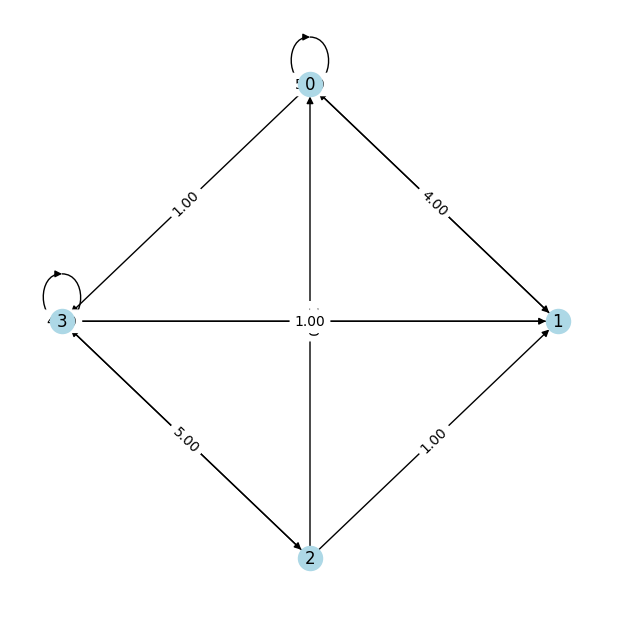

In [5]:
print("Original graph")
draw_graph(A)

In [6]:
U, S, VT = np.linalg.svd(A)
V = VT.T
S = np.diag(S)

# what does a column in U mean?

note that the inflow of each node from all other nodes is the same

In [ ]:
U_column = U[:,0:1] @ np.ones((1,n))
np.fill_diagonal(U_column, 0)
print(U_column)
slider = widgets.IntSlider(
    value=0,          # Initial value
    min=0,             # Minimum value
    max=n-1,           # Maximum value
    step=1,            # Step size
    description='Node:',  # Label for the slider
    continuous_update=True, # Update the value continuously as the slider moves
    layout=widgets.Layout(width='60%')
)

def vis_u_column(node):
    node_only = U_column.copy()
    node_only[:node,:] = 0 
    node_only[node + 1:,:] = 0
    draw_graph(node_only)

interactive_plot = widgets.interactive(vis_u_column, node=slider)
display(interactive_plot)

[[ 0.         -0.52330926 -0.52330926 -0.52330926]
 [-0.34302845  0.         -0.34302845 -0.34302845]
 [-0.52030841 -0.52030841  0.         -0.52030841]
 [-0.58116956 -0.58116956 -0.58116956  0.        ]]


interactive(children=(IntSlider(value=0, description='Node:', layout=Layout(width='60%'), max=3), Output()), _…

# what does a column in V mean?
note that the outflow of each node is uniform to all other nodes

In [8]:
V_column = np.ones((n,1)) @ V[:,0:1].T
np.fill_diagonal(V_column, 0)
print(V_column)
slider = widgets.IntSlider(
    value=0,          # Initial value
    min=0,             # Minimum value
    max=n-1,           # Maximum value
    step=1,            # Step size
    description='Node:',  # Label for the slider
    continuous_update=True, # Update the value continuously as the slider moves
    layout=widgets.Layout(width='60%')
)

def vis_v_column(node):
    node_only = V_column.copy()
    node_only[:,:node] = 0 
    node_only[:,node + 1:] = 0
    draw_graph(node_only)

interactive_plot = widgets.interactive(vis_v_column, node=slider)
display(interactive_plot)

[[ 0.         -0.32052152 -0.34865043 -0.69500468]
 [-0.54099661  0.         -0.34865043 -0.69500468]
 [-0.54099661 -0.32052152  0.         -0.69500468]
 [-0.54099661 -0.32052152 -0.34865043  0.        ]]


interactive(children=(IntSlider(value=0, description='Node:', layout=Layout(width='60%'), max=3), Output()), _…

# what does each sigma mean when combined with u and v?

[[2.35958499 1.39797137 1.52065706 3.03129925]
 [1.54670449 0.91636818 0.99678847 1.9870122 ]
 [2.34605426 1.38995489 1.51193705 3.01391666]
 [2.62047524 1.5525397  1.68879027 3.36645837]]
[-3.01073513  1.76466311 -2.09061723 -1.85762151]


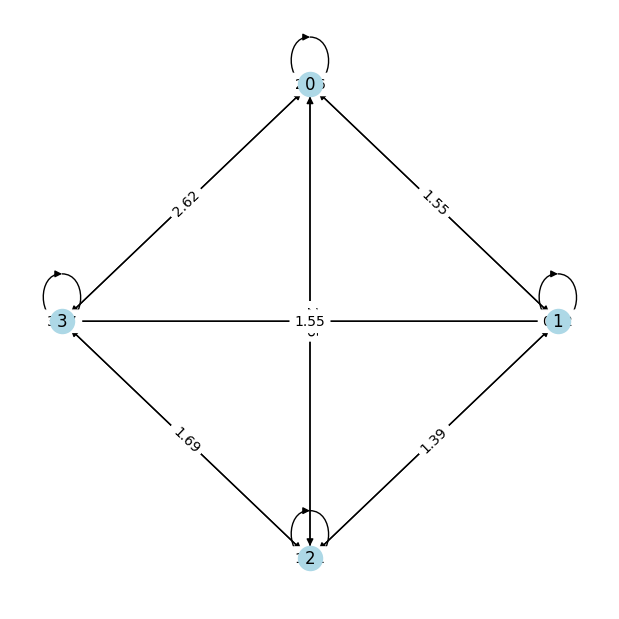

In [9]:
print(S[0,0] * U[:,0:1] @ V[:,0:1].T)
draw_graph(S[0,0] * U[:,0:1] @ V[:,0:1].T)
print([0,2,0,4] @ U)